In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
seffaflik.Kimlik(istemci_taniticisi="berkay")

In [45]:
vars_to_use = ['Rüzgar', 'Güneş']

In [95]:
df = uretim.gerceklesen(baslangic_tarihi='2021-06-01', bitis_tarihi='2021-06-15')

In [96]:
df.columns

Index(['Tarih', 'Saat', 'Doğalgaz', 'Barajlı', 'Linyit', 'Akarsu',
       'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeo Termal',
       'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG',
       'Uluslararası', 'Toplam'],
      dtype='object')

In [97]:
df_set = df[vars_to_use]

In [98]:
df_set.isna().sum()

Rüzgar    0
Güneş     0
dtype: int64

In [99]:
df_set.describe()

,Rüzgar,Güneş
count,360.000000,360.000000
mean,2018.113667,228.447389
std,891.356838,238.630532
min,347.350000,0.000000
25%,1338.610000,0.000000
50%,1849.730000,134.880000
75%,2725.252500,490.030000
max,4319.960000,610.040000


<AxesSubplot:xlabel='Güneş'>

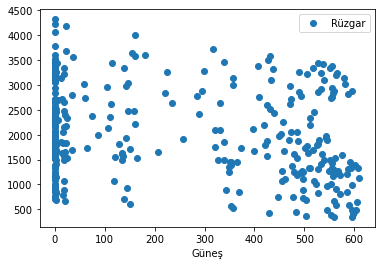

In [100]:
df_set.plot(x='Güneş', y='Rüzgar', style='o')

(array([168.,  10.,  21.,   4.,   5.,  20.,  11.,  28.,  44.,  49.]),
 array([  0.   ,  61.004, 122.008, 183.012, 244.016, 305.02 , 366.024,
        427.028, 488.032, 549.036, 610.04 ]),
 <BarContainer object of 10 artists>)

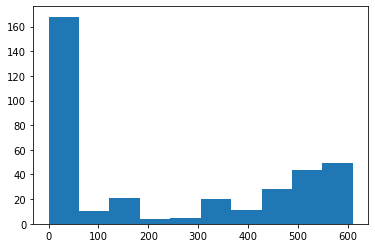

In [112]:
plt.hist(df_set['Güneş'])

(array([26., 34., 58., 73., 42., 38., 34., 41.,  9.,  5.]),
 array([ 347.35 ,  744.611, 1141.872, 1539.133, 1936.394, 2333.655,
        2730.916, 3128.177, 3525.438, 3922.699, 4319.96 ]),
 <BarContainer object of 10 artists>)

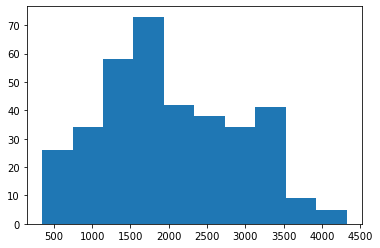

In [113]:
plt.hist(df_set['Rüzgar'])

In [145]:
df_set.columns

Index(['Rüzgar', 'Güneş'], dtype='object')

In [136]:
scaler = StandardScaler()
df_norm = scaler.fit_transform(df_set)

In [144]:
df_norm.mean(axis=0)

array([ 2.96059473e-16, -2.71387850e-17])

In [147]:
X = df_norm[:,-1].reshape(-1,1)
y = df_norm[:,0].reshape(-1,1)

In [148]:
X.shape

(360, 1)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [150]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [151]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-0.01917324]
[[-0.20831618]]


In [152]:
y_pred = regressor.predict(X_test)

In [153]:
df_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_model

,Actual,Predicted
0,0.804597,0.127827
1,-1.357330,-0.318390
2,2.477858,0.180531
3,-0.761836,-0.338470
4,-1.681770,-0.131001
...,...,...
67,-0.553200,0.180452
68,-0.390874,-0.221146
69,-1.616970,-0.335131
70,-0.498927,0.165277


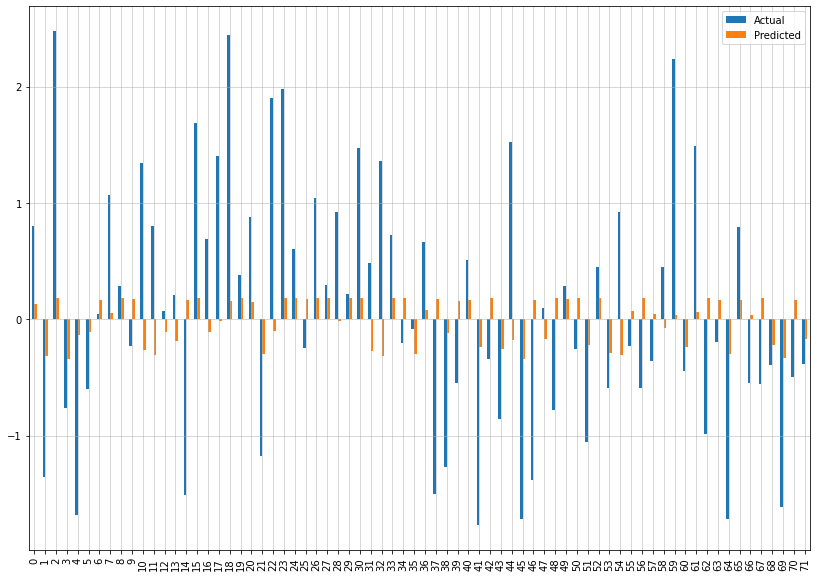

In [154]:
df_model.plot(kind='bar', figsize=(14,10))
plt.grid(which='major', linestyle='-', linewidth=0.5)
plt.show()

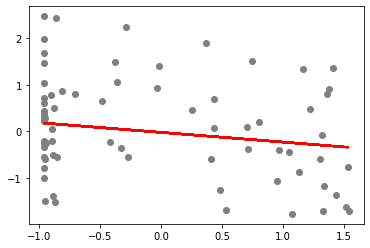

In [155]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [156]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.8550408674691984
MSE: 1.0791887961109015
RMSE: 1.038840120572411


In [157]:
y_test.mean()

0.09147111399323708